<a href="https://colab.research.google.com/github/volvox747/Deep-Learning/blob/master/Untitled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)


2.3.0


In [2]:
(X_train,Y_train),(X_test,Y_test)=tf.keras.datasets.cifar10.load_data()
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
Y_train=tf.keras.utils.to_categorical(Y_train)
Y_test=tf.keras.utils.to_categorical(Y_test)

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
#X_train = X_train.reshape(X_train.shape[0], 3072)
print(X_train.shape)
print(X_test.shape)
print(Y_train[0])
print(Y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
(10000, 10)


In [4]:
X_train=X_train/255
X_test=X_test/255


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.97):
      self.model.stop_training=True
callbacks=myCallback()

In [5]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(54,(3,3),activation='relu',input_shape=(32,32,3),padding='same',strides=(1,1)),
                                  
                                  tf.keras.layers.Dropout(0.25),
                                  tf.keras.layers.Conv2D(72,(3,3),activation='relu',padding='same',strides=(1,1)),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Dropout(0.25),
                                  tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same',strides=(1,1)),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Conv2D(150,(3,3),activation='relu',padding='same',strides=(1,1)),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Dropout(0.3),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dropout(0.5),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dropout(0.4),
                                  tf.keras.layers.Dense(250,activation='relu'),
                                  tf.keras.layers.Dense(10,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 54)        1512      
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 54)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 72)        35064     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 72)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 72)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       83072     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0

In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),batch_size=100,epochs=300,callbacks=[callbacks],verbose=1)

Epoch 1/300
500/500 [==============================] - 20s 41ms/step - loss: 1.7035 - accuracy: 0.3652 - val_loss: 1.2875 - val_accuracy: 0.5428
Epoch 2/300
500/500 [==============================] - 20s 40ms/step - loss: 1.2732 - accuracy: 0.5417 - val_loss: 1.1136 - val_accuracy: 0.6015
Epoch 3/300
500/500 [==============================] - 20s 40ms/step - loss: 1.1034 - accuracy: 0.6041 - val_loss: 0.9308 - val_accuracy: 0.6785
Epoch 4/300
500/500 [==============================] - 20s 40ms/step - loss: 1.0074 - accuracy: 0.6408 - val_loss: 0.8483 - val_accuracy: 0.7088
Epoch 5/300
500/500 [==============================] - 20s 40ms/step - loss: 0.9380 - accuracy: 0.6666 - val_loss: 0.8031 - val_accuracy: 0.7238
Epoch 6/300
500/500 [==============================] - 20s 40ms/step - loss: 0.8875 - accuracy: 0.6867 - val_loss: 0.7755 - val_accuracy: 0.7390
Epoch 7/300
500/500 [==============================] - 20s 40ms/step - loss: 0.8496 - accuracy: 0.6989 - val_loss: 0.7559 - val_ac

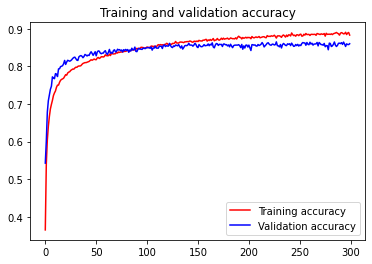

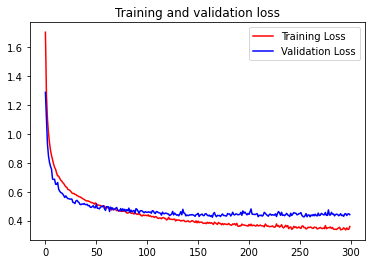

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
loss_and_acurracy=model.evaluate(X_test,Y_test,batch_size=128)

79/79 [==============================] - 1s 15ms/step - loss: 0.4412 - accuracy: 0.8602


In [11]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(32, 32))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving mare-561221_1280.jpg to mare-561221_1280.jpg
mare-561221_1280.jpg
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
